In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy_indexed as npi
from labellines import labelLines
import os
import sys

'''
Script to compare litos and stability setup JV scan pixel by pixel
replace file path below
'''

# litos_file_path = r"C:\Users\achen\Dropbox\code\Stability-Setup\data\photodiodetest\Litos_analyzed\0\Data\photo - 0p_0.0Sun_Scan0.txt"
# ss_file_path = r"C:\Users\achen\Dropbox\code\Stability-Setup\data\photodiodetest\0p\Nov-08-2023 15_57_40lightID1scan.csv"



'\nScript to compare litos and stability setup JV scan pixel by pixel\nreplace file path below\n'

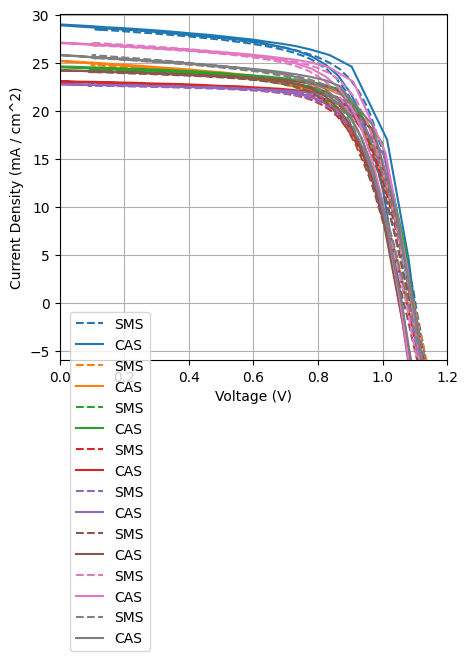

[1 2 6 0 5 7 3 4]
[7 5 4 2 3 1 0 6]
[5 3 2 6 4 7 0 1]
[1 7 4 3 5 6 2 0]
0.009415624999999997 0.01711725
0.018453250000000088 0.012700125000000007
average vmpp diff:  0.013266437499999999
average voc diff: 0.015576687500000047


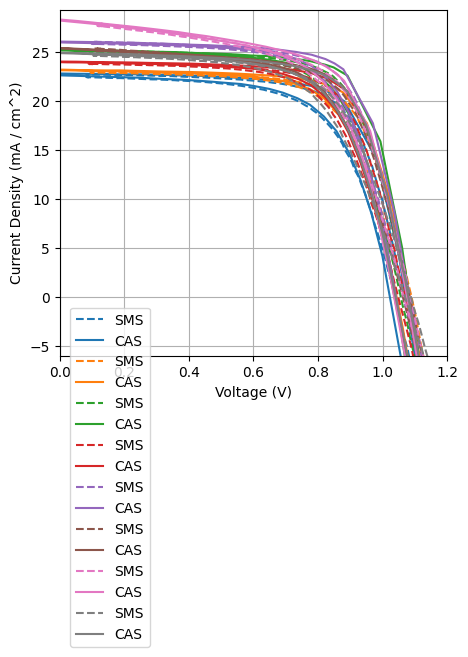

[0 1 7 6 2 5 4 3]
[6 4 1 3 5 0 7 2]
[5 2 7 1 4 3 6 0]
[6 1 4 3 2 5 0 7]
0.010285499999999975 0.0298345
0.014602000000000045 0.011252999999999957
average vmpp diff:  0.020059999999999988
average voc diff: 0.012927500000000001


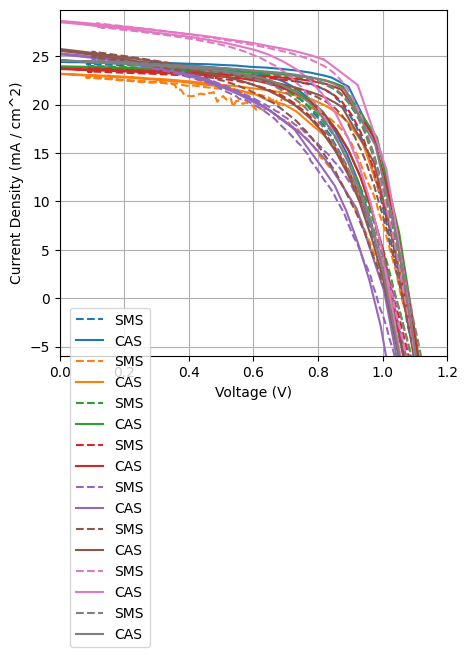

[5 2 7 0 1 4 3 6]
[1 3 2 7 5 4 0 6]
[5 1 4 0 3 6 2 7]
[0 6 1 7 3 5 4 2]
0.026883625000000022 0.038007250000000006
0.028774125000000025 0.017516999999999977
average vmpp diff:  0.032445437500000014
average voc diff: 0.0231455625


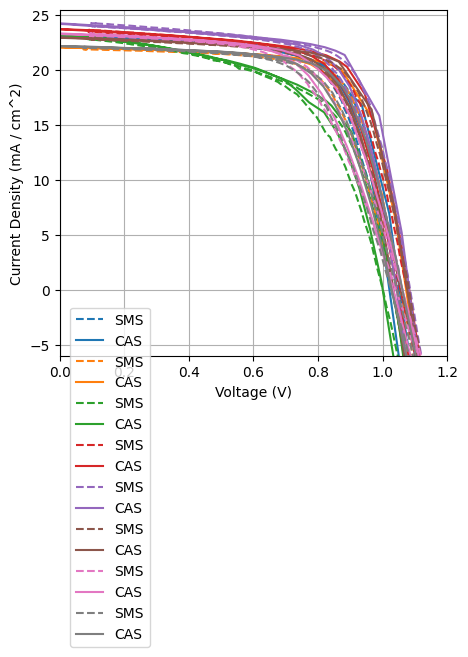

[4 6 2 5 7 3 1 0]
[4 5 6 1 0 2 3 7]
[5 4 2 3 6 7 1 0]
[7 3 5 2 6 0 4 1]
0.014442000000000024 0.023409
0.014717874999999991 0.018256000000000022
average vmpp diff:  0.018925500000000012
average voc diff: 0.016486937500000007


C:\Users\Andrew Chen\AppData\Local\Temp\ipykernel_5672\2811859460.py:250: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_plot_data_vmpp, labels=labels_vmpp)


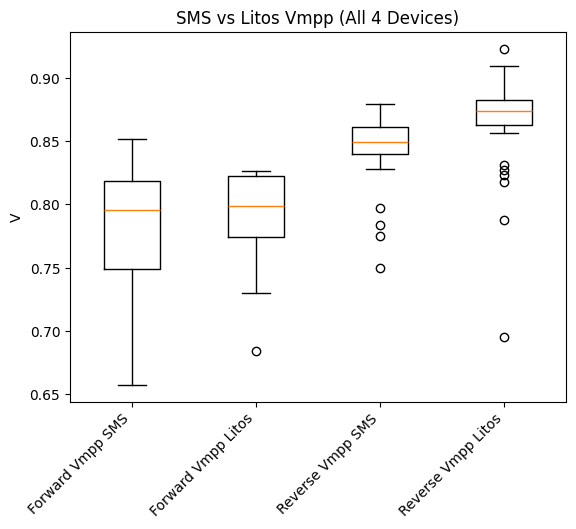

C:\Users\Andrew Chen\AppData\Local\Temp\ipykernel_5672\2811859460.py:257: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_plot_data_voc, labels=labels_voc)


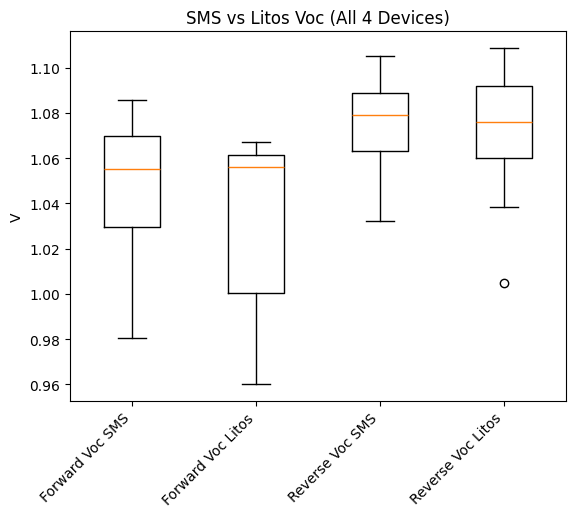

[[np.float64(0.8273), np.float64(0.8236), np.float64(0.8258), np.float64(0.8433), np.float64(0.8521), np.float64(0.817), np.float64(0.8217), np.float64(0.8374), np.float64(0.7744), np.float64(0.8174), np.float64(0.8082), np.float64(0.7993), np.float64(0.7989), np.float64(0.7916), np.float64(0.7865), np.float64(0.779), np.float64(0.7498), np.float64(0.7079), np.float64(0.7664), np.float64(0.7312), np.float64(0.6576), np.float64(0.7217), np.float64(0.7188), np.float64(0.7462), np.float64(0.7932), np.float64(0.7975), np.float64(0.7356), np.float64(0.8005), np.float64(0.8213), np.float64(0.8128), np.float64(0.7371), np.float64(0.7635)], [np.float64(0.823816), np.float64(0.825117), np.float64(0.824042), np.float64(0.822372), np.float64(0.826235), np.float64(0.82083), np.float64(0.82352), np.float64(0.821277), np.float64(0.775198), np.float64(0.81833), np.float64(0.82002), np.float64(0.777464), np.float64(0.819839), np.float64(0.778393), np.float64(0.775363), np.float64(0.777383), np.float64

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import numpy_indexed as npi
from labellines import labelLines
from matplotlib.font_manager import FontProperties
import os
import sys
import re

def plot_difference(litos_directory, ss_file_path):
	# litos_directory = ""
	# litos_directory = r"C:\Users\achen\Dropbox\code\Stability-Setup\data\Mar-4-2025 4 device test\2025-03-04-- Litos New PCB 4 Device comparison\devices\device_2"

	all_files = []

	if litos_directory != "":
		for root, dirs, files in os.walk(litos_directory):
			for file in files:
				if file.endswith('.csv'):
					file_path = os.path.join(root, file)
					all_files.append(file_path)

	litos_voltage = []
	litos_current = []

	# Process each file
	for file_path in all_files:
		if "_1_0" in file_path:
			try:
				data = np.genfromtxt(
					file_path,
					delimiter=',',
					comments='#',
					skip_header=0,
					encoding='cp1252'  # Specify the correct encoding
				)
				voltage = data[:, 0]
				current = data[:,1] / 0.128
				# data_with_pce= np.column_stack((data, pce))

				litos_voltage.append(voltage)
				litos_current.append(current)
			except Exception as e:
				print(f"Error processing {file_path}: {e}")


	np.set_printoptions(threshold=np.inf)
	data = []
	# ss_file_path = ""
	# ss_file_path = r"C:\Users\achen\Dropbox\code\Stability-Setup\data\Mar-4-2025 4 device test\Mar-04-2025 16_42_19__4 Device First Test\Mar-04-2025_16-44-53__4 Device First Test__ID2__mppt.csv"
	if ss_file_path != "":
		arr = np.loadtxt(ss_file_path, delimiter=",", dtype=str)
		header_row = np.where(arr == "Time")[0][0]

		meta_data = {}
		for data in arr[:header_row, :2]:
			meta_data[data[0]] = data[1]

		headers = arr[header_row, :]
		arr = arr[header_row + 1 :, :]

		data = arr[:, 2:-1]

		pixel_V = data[:, ::2][:, ::-1].astype(float)
		pixel_mA = data[:, 1::2][:, ::-1].astype(float)/ float(meta_data["Cell Area (mm^2)"])
		# if ("Cell Area (mm^2)" in meta_data):
		#     pixel_mA /= float(meta_data["Cell Area (mm^2)"])
		# else:
		#     pixel_mA /= 0.128

	plt.figure(figsize=(5,4.5))
	plt.xlim(0,1.2)
	top = max(np.max(pixel_mA), np.max(current))*1.05
	plt.ylim(bottom = -6, top = top)
	plt.xlabel('Voltage (V)')
	plt.ylabel('Current Density (mA / cm^2)')
	plt.grid()
	ax = plt.gca()
	# ax.spines['bottom'].set_position(('data', 0))
	colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

	avg_vmpp_diff_forward = []
	vmpp_forward_sms = []
	vmpp_forward_litos = []

	avg_vmpp_diff_reverse = []
	vmpp_reverse_sms = []
	vmpp_reverse_litos = []

	avg_voc_diff_forward = []
	voc_forward_sms = []
	voc_forward_litos = []

	avg_voc_diff_reverse = []
	voc_reverse_sms = []
	voc_reverse_litos = []
	for i in range(8):

		lineName = "SMS"
		if ss_file_path:
			plt.plot(pixel_V[:,i],
					 pixel_mA[:,i],
					 linestyle='--',
					 color=colors[i % len(colors)],
					 label = lineName)
		if True:
			# plt.hlines(pce[i], x_start, x_end, label="litos_pce" + str(i + 1))
			plt.plot(litos_voltage[i],
					 litos_current[i],
					 color=colors[i % len(colors)],
					 label = "CAS")

		ss_half = len(pixel_V[:, i]) // 2
		litos_half = len(litos_voltage[i]) // 2

		# Forward Scan
		pceList = pixel_V[:ss_half, i] * pixel_mA[:ss_half, i]
		pceListLitos = litos_voltage[i][:litos_half] * litos_current[i][:litos_half]

		max_V_idx = np.argmax(pceList, axis=0)  # index relative to first half
		max_V_idx_litos = np.nanargmax(pceListLitos, axis=0)  # relative to first half

		vmpp_forward_sms.append(pixel_V[max_V_idx, i])
		vmpp_reverse_litos.append(litos_voltage[i][max_V_idx_litos])

		# Voc calculation for forward scan using the first half
		min_current_idx = min(
			range(len(pixel_mA[:ss_half, i])),
			key=lambda x: abs(pixel_mA[:ss_half, i][x])
		)
		min_current_idx_litos = min(
			range(len(litos_current[i][:litos_half])),
			key=lambda x: abs(litos_current[i][:litos_half][x])
		)

		voc_forward_sms.append(pixel_V[min_current_idx, i])
		voc_reverse_litos.append(litos_voltage[i][min_current_idx_litos])


		# Reverse Scan
		pceList = pixel_V[ss_half:, i] * pixel_mA[ss_half:, i]
		pceListLitos = litos_voltage[i][litos_half:] * litos_current[i][litos_half:]

		max_V_idx_relative = np.argmax(pceList, axis=0)
		max_V_idx = max_V_idx_relative + ss_half  # adjust index for full array
		max_V_idx_litos_relative = np.nanargmax(pceListLitos, axis=0)
		max_V_idx_litos = max_V_idx_litos_relative + litos_half  # adjust index

		vmpp_reverse_sms.append(pixel_V[max_V_idx, i])
		vmpp_forward_litos.append(litos_voltage[i][max_V_idx_litos])


		# Voc calculation for reverse scan using the second half
		min_current_idx_relative = min(
			range(len(pixel_mA[ss_half:, i])),
			key=lambda x: abs(pixel_mA[ss_half:, i][x])
		)
		min_current_idx = min_current_idx_relative + ss_half  # adjust index
		min_current_idx_litos_relative = min(
			range(len(litos_current[i][litos_half:])),
			key=lambda x: abs(litos_current[i][litos_half:][x])
		)
		min_current_idx_litos = min_current_idx_litos_relative + litos_half  # adjust index

		voc_reverse_sms.append(pixel_V[min_current_idx, i])
		voc_forward_litos.append(litos_voltage[i][min_current_idx_litos])\


	vmpp_forward_sms = np.array(vmpp_forward_sms)
	vmpp_forward_litos = np.array(vmpp_forward_litos)
	vmpp_reverse_sms = np.array(vmpp_reverse_sms)
	vmpp_reverse_litos = np.array(vmpp_reverse_litos)
	voc_forward_sms = np.array(voc_forward_sms)
	voc_forward_litos = np.array(voc_forward_litos)
	voc_reverse_sms = np.array(voc_reverse_sms)
	voc_reverse_litos = np.array(voc_reverse_litos)


	avg_vmpp_diff_forward = vmpp_forward_sms - vmpp_forward_litos
	avg_vmpp_diff_forward = np.abs(avg_vmpp_diff_forward)

	avg_vmpp_diff_reverse = vmpp_reverse_sms - vmpp_reverse_litos
	avg_vmpp_diff_reverse = np.abs(avg_vmpp_diff_reverse)

	avg_voc_diff_forward = voc_forward_sms - voc_forward_litos
	avg_voc_diff_forward = np.abs(avg_voc_diff_forward)

	avg_voc_diff_reverse = voc_reverse_sms - voc_reverse_litos
	avg_voc_diff_reverse = np.abs(avg_voc_diff_reverse)

	plt.legend(bbox_to_anchor=(0.25, 0.16))
	plt.show()
	box_plot_data_vmpp = [vmpp_forward_sms, vmpp_forward_litos,vmpp_reverse_sms, vmpp_reverse_litos]

	box_plot_data_voc = [voc_forward_sms, voc_forward_litos, voc_reverse_sms, voc_reverse_litos]

	return avg_vmpp_diff_forward, avg_voc_diff_forward, avg_vmpp_diff_reverse, avg_voc_diff_reverse, box_plot_data_vmpp, box_plot_data_voc

files = []
# for i in range(1,5):
# 	files.append([
# 		rf"C:\Users\achen\Dropbox\code\Stability-Setup\data\April-03-2025 litos\devices\{i}",
# 		rf"C:\Users\achen\Dropbox\code\Stability-Setup\data\Apr-03-2025 19_18_09\Apr-03-2025_19-18-19__ID{i}__light__scan.csv"
# 	])

r"""
Best performing
for i in range(4,5):

for i in range(4,5):
	files.append([
		rf"C:\Users\Andrew Chen\Dropbox\code\Stability-Setup\data\Apr-10-2025 18_28_52\Litos\devices\{i}",
		rf"C:\Users\Andrew Chen\Dropbox\code\Stability-Setup\data\Apr-10-2025 18_28_52\Apr-10-2025_18-39-43__ID{i}__light__scan.csv"
	])

"""
for i in range(1,5):
	files.append([
		rf"C:\Users\Andrew Chen\Dropbox\code\Stability-Setup\data\Apr-10-2025 18_28_52\Litos\devices\{i}",
		rf"C:\Users\Andrew Chen\Dropbox\code\Stability-Setup\data\Apr-10-2025 18_28_52\Apr-10-2025_18-39-43__ID{i}__light__scan.csv"
	])

average_VOC = []
average_VMPP = []
box_plot_data_voc = [[],[],[],[]]
box_plot_data_vmpp = [[],[],[],[]]
for litos, ss_file in files:
	vmpp_diff_forward, voc_diff_forward, vmpp_diff_reverse, voc_diff_reverse, temp_vmpp, temp_voc = plot_difference(litos, ss_file)
	vmpp_diffs_forward = [float(x) for x in vmpp_diff_forward]
	voc_diffs_forward = [float(x) for x in voc_diff_forward]
	vmpp_diffs_reverse = [float(x) for x in vmpp_diff_reverse]
	voc_diffs_reverse = [float(x) for x in voc_diff_reverse]
	print(np.argsort(vmpp_diffs_forward))
	print(np.argsort(vmpp_diffs_reverse))
	print(np.argsort(voc_diffs_forward))
	print(np.argsort(voc_diffs_reverse))
	print(np.mean(vmpp_diffs_forward), np.mean(vmpp_diffs_reverse))
	print(np.mean(voc_diffs_forward), np.mean(voc_diffs_reverse))
	print("average vmpp diff: ", np.mean(vmpp_diffs_forward + vmpp_diffs_reverse))
	print("average voc diff:", np.mean(voc_diffs_forward + voc_diffs_reverse))
	average_VMPP.append(np.mean(vmpp_diffs_forward + vmpp_diffs_reverse))
	average_VOC.append(np.mean(voc_diffs_forward + voc_diffs_reverse))
	for i in range(4):
		box_plot_data_voc[i].extend(temp_voc[i])
		box_plot_data_vmpp[i].extend(temp_vmpp[i])


labels_vmpp = ['Forward Vmpp SMS', 'Forward Vmpp Litos','Reverse Vmpp SMS','Reverse Vmpp Litos',]

plt.boxplot(box_plot_data_vmpp, labels=labels_vmpp)
plt.xticks(rotation=45, ha='right')  # Rotate labels diagonally
plt.title("SMS vs Litos Vmpp (All 4 Devices)")
plt.ylabel("V")
plt.show()

labels_voc = ['Forward Voc SMS', 'Forward Voc Litos','Reverse Voc SMS','Reverse Voc Litos',]
plt.boxplot(box_plot_data_voc, labels=labels_voc)
plt.xticks(rotation=45, ha='right')  # Rotate labels diagonally
plt.title("SMS vs Litos Voc (All 4 Devices)")
plt.ylabel("V")
plt.show()
print(box_plot_data_vmpp)
print(f"Total Average VOC diff = {np.mean(average_VOC)}")
print(f"Total Average VMPP diff = {np.mean(average_VMPP)}")

c:\Users\achen\miniforge3\envs\stabilitySetup\lib\site-packages\labellines\core.py:204: UserWarning: The value at position 0 in `xvals` is outside the range of its associated line (xmin=0.0, xmax=0.0943, xval=0.12662563500000004). Clipping it into the allowed range.
  warnings.warn(


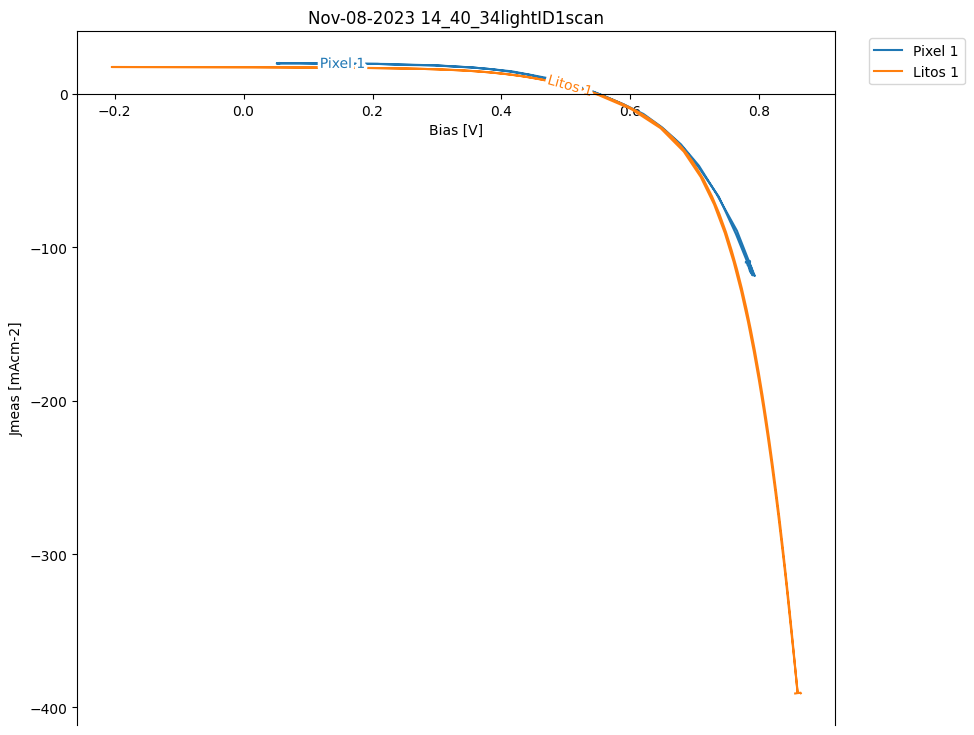

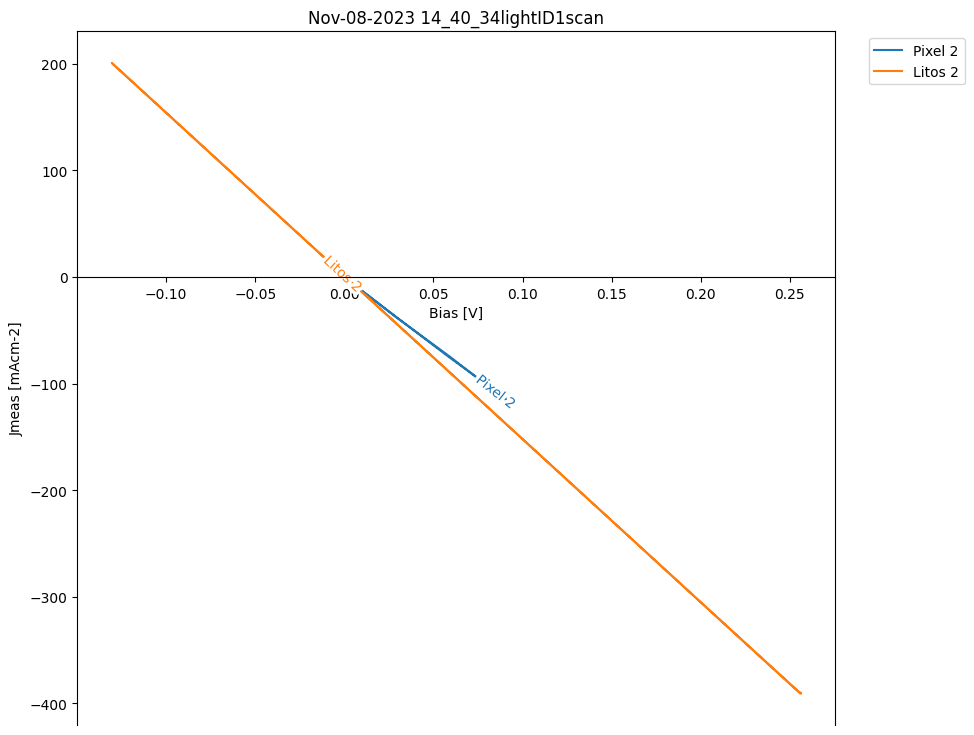

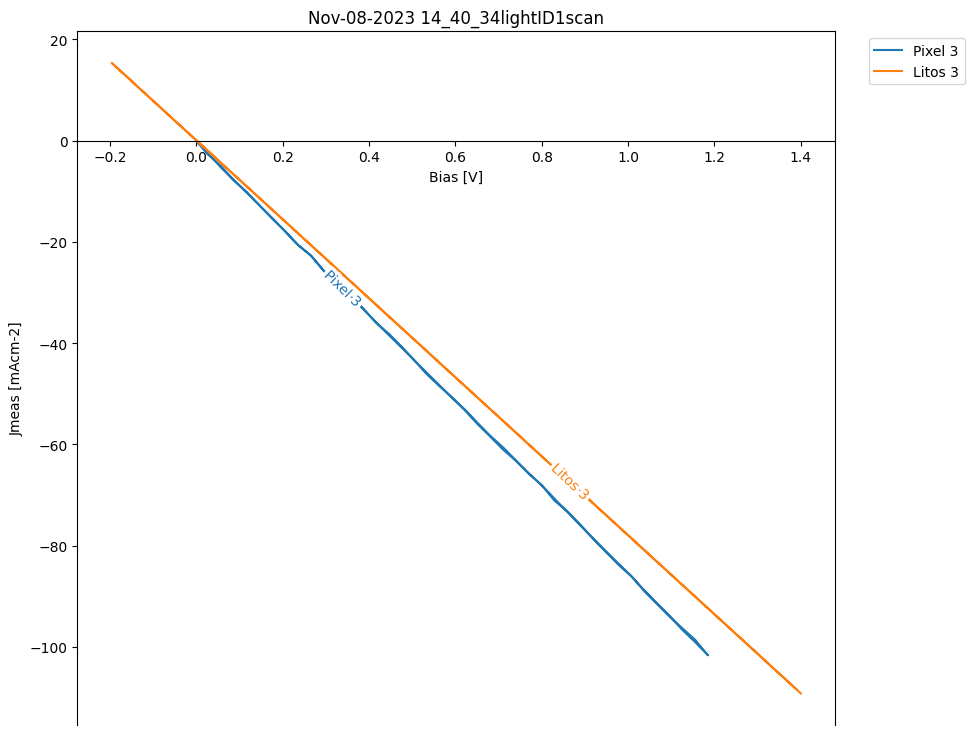

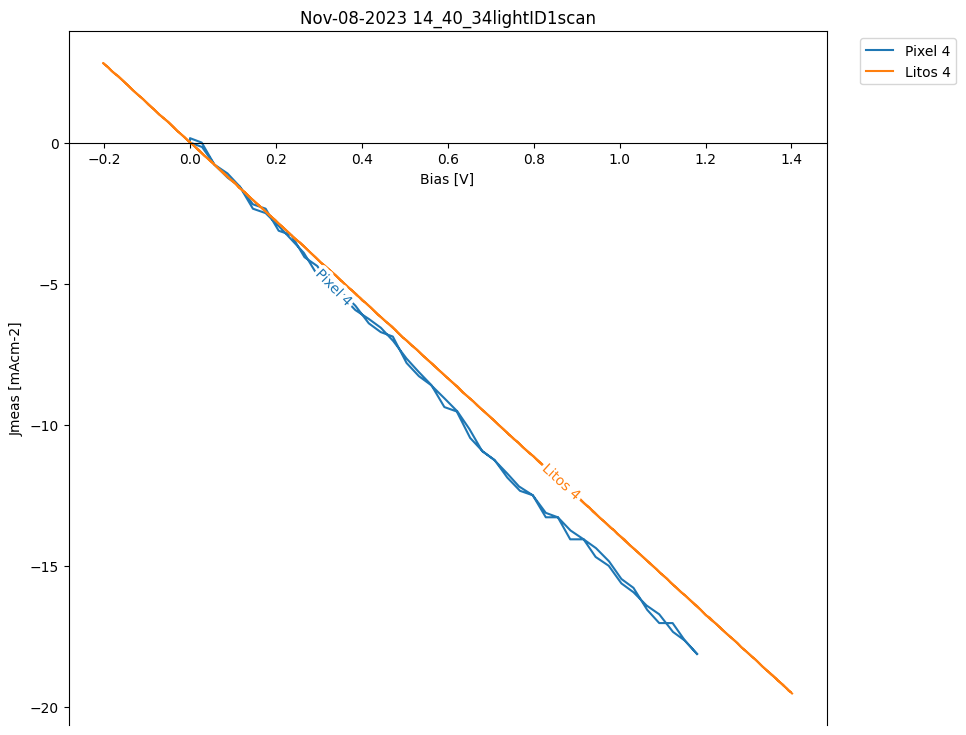

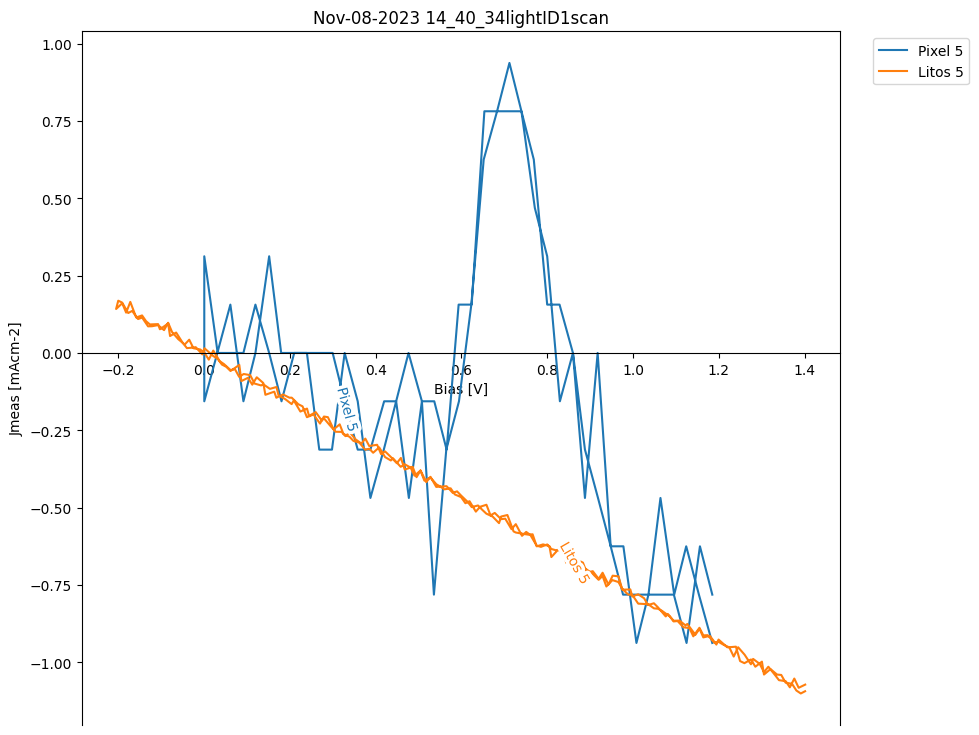

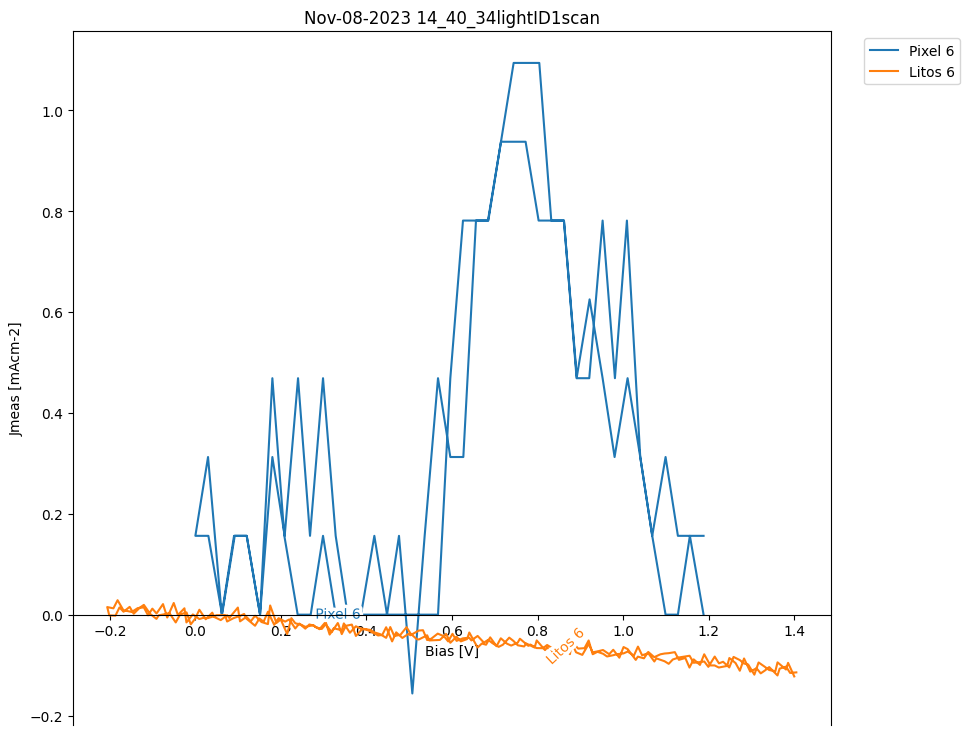

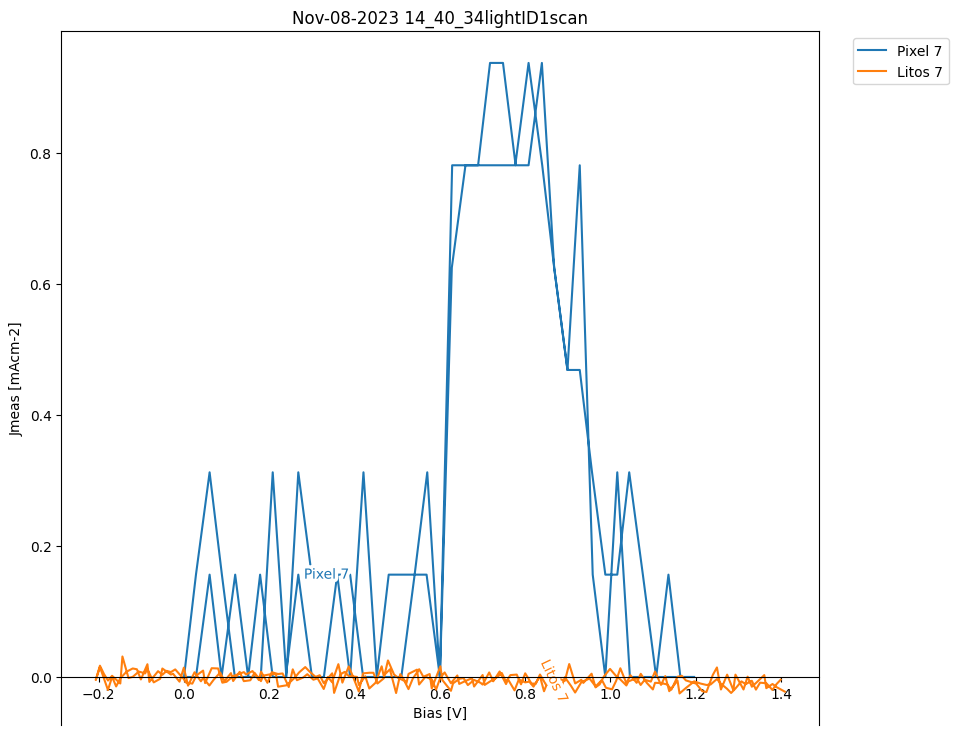

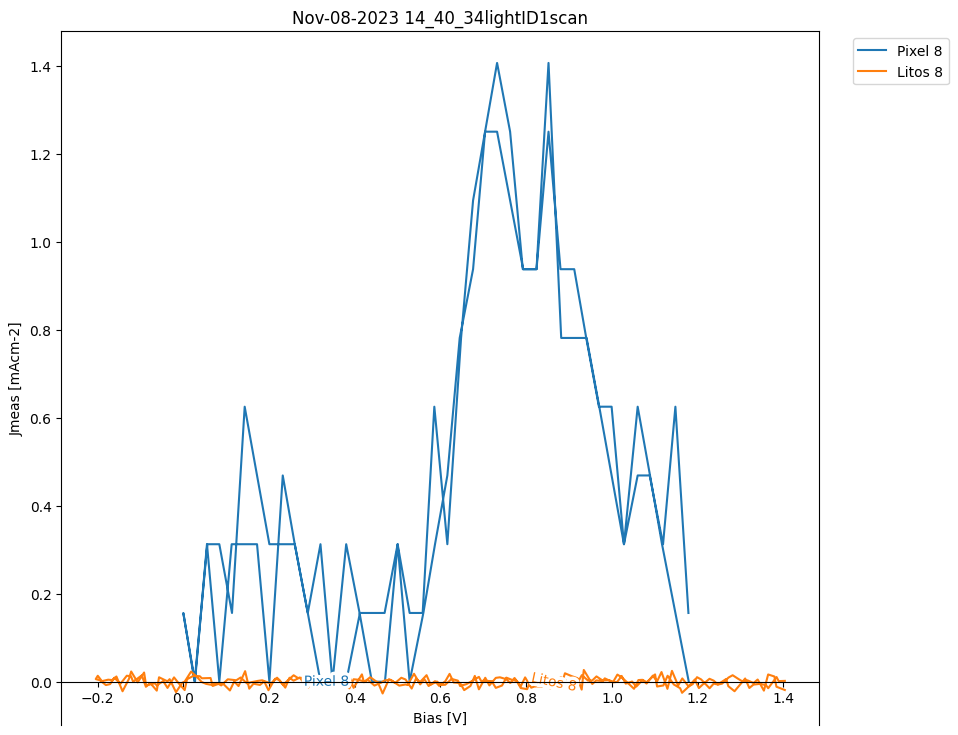

In [ ]:

litos_file_path = r"C:\Users\achen\Dropbox\code\Stability-Setup\data\photodiodetest\Litos_analyzed\100\Data\photo - 100p_1.0Sun_Scan0.txt"
ss_file_path = r"C:\Users\achen\Dropbox\code\Stability-Setup\data\photodiodetest\100p\Nov-08-2023 14_40_34lightID1scan.csv"

litos = np.loadtxt(litos_file_path,
					 delimiter="\t",
					 dtype=str)
litos = litos.T
litos = litos[:,1:].astype(float)

arr = np.loadtxt(ss_file_path,
					 delimiter=",",
					 dtype=str)
NUM_DEVICES = int((arr.shape[1]-2)/16)
device_to_pixels = {}
for i in range(NUM_DEVICES):
	device_to_pixels[i] = [j + 8*i for j in range(8)]

headers = arr[6,:]
header_dict = {value: index for index, value in enumerate(headers)}
arr = arr[7:, :]
voltage = arr[:, 2]
length = (len(headers) - 1)


jvList = []
for i in range(2, length): #remove timing and voltage output from array
	jvList.append(arr[:,i])

for i in range(0,len(jvList),2):
	# print(i)
	jvList[i] = [float(j) for j in jvList[i]]
	# jvList[i] = [float(v) - 5*float(j)*0.001 for v, j in zip(jvList[i], jvList[i+1])]
	jvList[i+1] = [float(x)/0.128 for x in jvList[i+1]]

# print(jvList)

plot_size = (10,8)
maxX = 1.3
minX = 0
maxY = 26
minY = -2

for i in range(0,len(litos),4):

	plot_title_orig = ss_file_path[:-4].split("\\")[-1]

	plt.figure(figsize=plot_size)
	# plt.xlim(minX,maxX)
	# plt.ylim(minY, maxY)
	plt.title(plot_title_orig)
	plt.xlabel('Bias [V]')
	plt.ylabel('Jmeas [mAcm-2]')
	# plt.ylabel('Jmeas [mA/cm]')
	plt.subplots_adjust(left=0.086, bottom=0.06, right=0.844, top=0.927, wspace=0.2, hspace=0.2)
	# print(dead_pixel, show_dead_pixels)
	# print(i)
	lineName = "Pixel " + str(int(i/4) + 1)
	# print(jvList[i],jvList[i+1])
	plt.plot(jvList[i//2],jvList[i//2+1], label = lineName)

	lineName = "Litos " + str(int(i/4) + 1)
	# print(litos[i],litos[i+1])

	plt.plot(np.concatenate((litos[len(litos)-(i+4)],litos[len(litos)-(i+2)])),np.concatenate((litos[len(litos)-(i+3)],litos[len(litos)-(i+1)])), label = lineName)

	ax = plt.gca()
	ax.spines['bottom'].set_position('zero')
	labelLines(plt.gca().get_lines(), zorder=2.5)

	plt.legend(bbox_to_anchor=(1.18, 1))
	plt.plot()

c:\Users\achen\miniforge3\envs\stabilitySetup\lib\site-packages\labellines\core.py:204: UserWarning: The value at position 2 in `xvals` is outside the range of its associated line (xmin=0.0, xmax=0.0943, xval=1.3455882352941178). Clipping it into the allowed range.
  warnings.warn(


[]

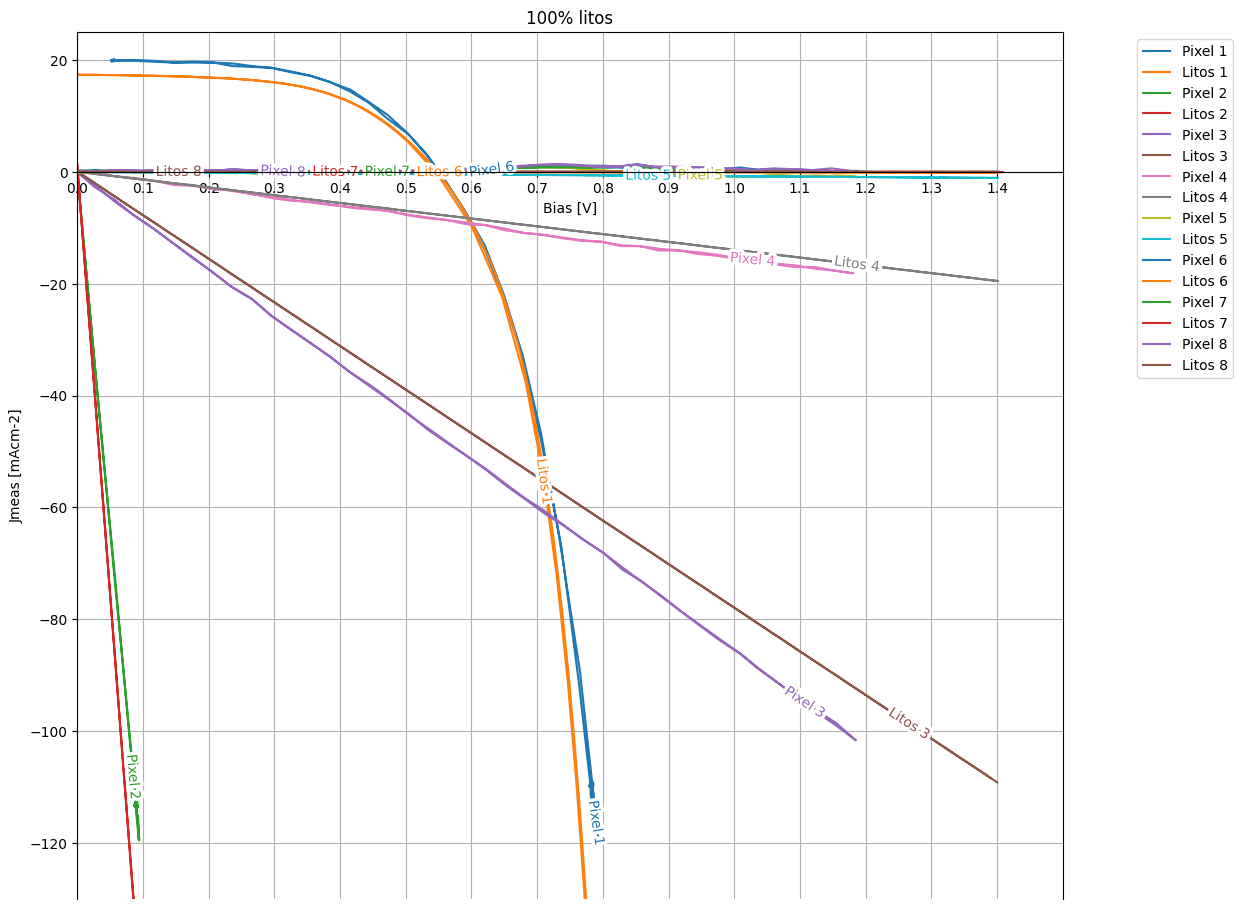

In [ ]:

# litos_file_path = r"C:\Users\achen\Dropbox\code\Stability-Setup\data\photodiodetest\Litos_analyzed\100\Data\photo - 100p_1.0Sun_Scan0.txt"
# ss_file_path = r"C:\Users\achen\Dropbox\code\Stability-Setup\data\photodiodetest\100p\Nov-08-2023 14_40_34lightID1scan.csv"

litos = np.loadtxt(litos_file_path,
					 delimiter="\t",
					 dtype=str)
litos = litos.T
litos = litos[:,1:].astype(float)

arr = np.loadtxt(ss_file_path,
					 delimiter=",",
					 dtype=str)
NUM_DEVICES = int((arr.shape[1]-2)/16)
device_to_pixels = {}
for i in range(NUM_DEVICES):
	device_to_pixels[i] = [j + 8*i for j in range(8)]

headers = arr[6,:]
header_dict = {value: index for index, value in enumerate(headers)}
arr = arr[7:, :]
voltage = arr[:, 2]
length = (len(headers) - 1)


jvList = []
for i in range(2, length): #remove timing and voltage output from array
	jvList.append(arr[:,i])

for i in range(0,len(jvList),2):
	# print(i)
	jvList[i] = [float(j) for j in jvList[i]]
	# jvList[i] = [float(v) + 5*float(j)*0.001 for v, j in zip(jvList[i], jvList[i+1])]
	jvList[i+1] = [float(x)/0.128 for x in jvList[i+1]]




# print(jvList)

plot_size = (13,10)

maxX = 1.5
minX = 0
maxY = 25
minY = -130
plot_title_orig = "100% litos"

plt.figure(figsize=plot_size)
plt.xlim(minX,maxX)
plt.ylim(minY, maxY)
plt.title(plot_title_orig)
plt.xlabel('Bias [V]')
plt.ylabel('Jmeas [mAcm-2]')
# plt.ylabel('Jmeas [mA/cm]')
plt.subplots_adjust(left=0.086, bottom=0.06, right=0.844, top=0.927, wspace=0.2, hspace=0.2)

for i in range(0,len(litos),4):
	# print(dead_pixel, show_dead_pixels)
	# print(i)
	litos_volt = np.concatenate((litos[len(litos)-(i+4)],litos[len(litos)-(i+2)]))
	litos_curr = np.concatenate((litos[len(litos)-(i+3)],litos[len(litos)-(i+1)]))
	# break
	litos_pce = max(litos_volt*litos_curr)
	setup_pce = max(np.array(jvList[i//2])*np.array(jvList[i//2+1]))

	# diff = np.diff()

	lineName = "Pixel " + str(int(i/4) + 1)
	# print(jvList[i],jvList[i+1])
	plt.plot(jvList[i//2],jvList[i//2+1], label = lineName)

	lineName = "Litos " + str(int(i/4) + 1)
	# print(litos[i],litos[i+1])
	plt.plot(np.concatenate((litos[len(litos)-(i+4)],litos[len(litos)-(i+2)])),np.concatenate((litos[len(litos)-(i+3)],litos[len(litos)-(i+1)])), label = lineName)

	# plt.plot(np.concatenate((litos[len(litos)-(i+4)],litos[len(litos)-(i+2)])),np.concatenate((litos[len(litos)-(i+3)],litos[len(litos)-(i+1)])), label = lineName)
plt.xticks(np.arange(minX, maxX, 0.1))
ax = plt.gca()
ax.spines['bottom'].set_position('zero')
labelLines(plt.gca().get_lines(), zorder=2.5)
plt.grid()
plt.legend(bbox_to_anchor=(1.18, 1))
plt.plot()